#人工智慧的商情預測，期中考:

學號：110AB0018

姓名：陳威成

上傳：把開放共用後的網址，上傳到Zuvio

---
#1.練習1：請讀入以下的csv檔案，用多項式預測，比較【4種的多項式預測線】？
#其中，第4種多項式預測線，必須最接近原始數據

資料集檔案：https://acupun.site/lecture/predict/example/resource/curve-3.csv

In [ ]:
%%capture
#--------------------------------
# colab繪圖顯示繁體中文
#--------------------------------
import matplotlib
# 先下載台北黑體字型
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download import matplotlib
# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
# 將 font-family 設為 Taipei Sans TC Beta
# 設定完後，之後的圖表都可以顯示中文了
matplotlib.rc('font', family='Taipei Sans TC Beta')

In [ ]:
import pandas as pd
import sklearn.preprocessing as prep
import sklearn.linear_model as lm
df=pd.read_csv("https://acupun.site/lecture/predict/example/resource/curve-3.csv")
#第一種:10項
model_1=prep.PolynomialFeatures(degree=10)
x_poly_1=model_1.fit_transform(df[["x"]])
model_1_2=lm.LinearRegression()
model_1_2.fit(x_poly_1, df[["y"]])
#第二種:15項
model_2=prep.PolynomialFeatures(degree=15)
x_poly_2=model_2.fit_transform(df[["x"]])
model_2_2=lm.LinearRegression()
model_2_2.fit(x_poly_2, df[["y"]])
#第三種:20項
model_3=prep.PolynomialFeatures(degree=20)
x_poly_3=model_3.fit_transform(df[["x"]])
model_3_2=lm.LinearRegression()
model_3_2.fit(x_poly_3, df[["y"]])
#第四種:40項
model_4=prep.PolynomialFeatures(degree=40)
x_poly_4=model_4.fit_transform(df[["x"]])
model_4_2=lm.LinearRegression()
model_4_2.fit(x_poly_4, df[["y"]])

LinearRegression()

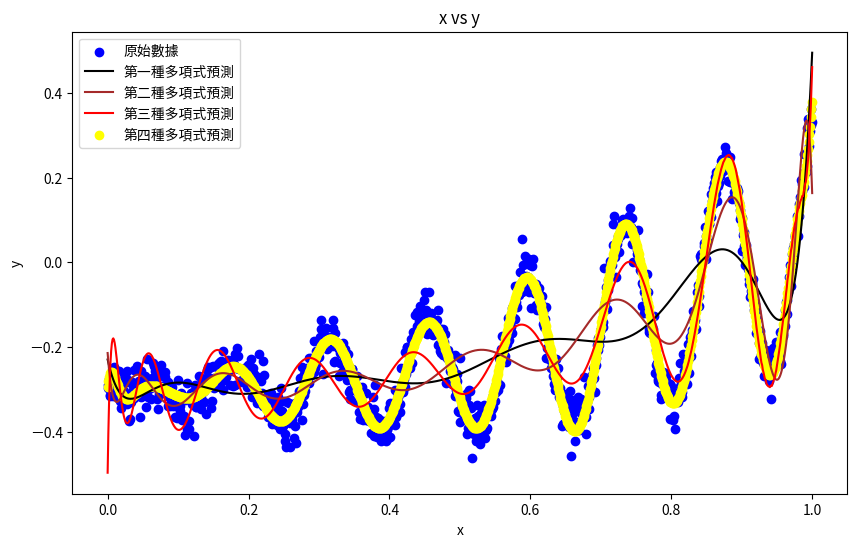

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
#原始數據
plt.scatter(df["x"],df["y"],color="blue",label="原始數據")
#第一種多項式預測
plt.plot(df["x"],model_1_2.predict(model_1.fit_transform(df[["x"]])),color='black',label='第一種多項式預測')
#第二種多項式預測
plt.plot(df["x"],model_2_2.predict(model_2.fit_transform(df[["x"]])),color='brown',label='第二種多項式預測')
#第三種多項式預測
plt.plot(df["x"],model_3_2.predict(model_3.fit_transform(df[["x"]])),color='red',label='第三種多項式預測')
#第四種多項式預測
plt.scatter(df["x"],model_4_2.predict(model_4.fit_transform(df[["x"]])),color='yellow',label='第四種多項式預測')
plt.title("x vs y")
plt.xlabel("x")
plt.ylabel("y",rotation=90)
plt.legend()
plt.show()

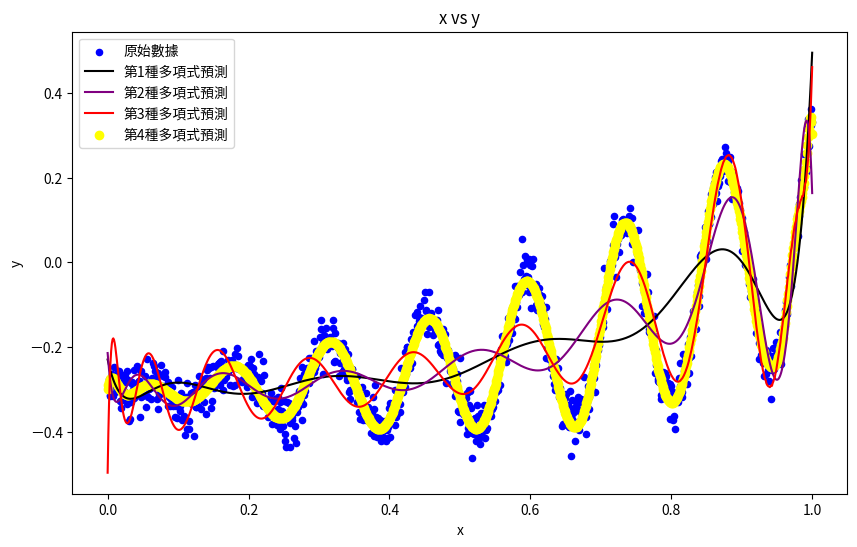

In [ ]:
#老師參考答案

---
##2.練習2：請用深度學習（多顆類神經網絡）來學習以下的csv檔案，並畫出『非線性迴歸線』
#請預測當x=1，y=？

資料集檔案：https://acupun.site/lecture/predict/example/resource/curve-3.csv

In [ ]:
import pandas as pd
import tensorflow as tf
df2=pd.read_csv("https://acupun.site/lecture/predict/example/resource/curve-3.csv")
#Step1:
model2=tf.keras.Sequential(
[
  tf.keras.layers.Dense(units=10,input_dim=1,activation='relu'),
  tf.keras.layers.Dense(units=100,activation='relu'),
  tf.keras.layers.Dense(units=50,activation='relu'),
  tf.keras.layers.Dense(units=1)
]
)
#Step2:
model2.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=tf.keras.metrics.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam()
)
#Step3:
model2.fit(df2[['x']],df2['y'],epochs=4000)
#Step4:
model2.predict([[1]])

串流輸出內容已截斷至最後 5000 行。
Epoch 1502/4000
32/32 [==============================] - 0s 3ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 1503/4000
32/32 [==============================] - 0s 3ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 1504/4000
32/32 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 1505/4000
32/32 [==============================] - 0s 4ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 1506/4000
32/32 [==============================] - 0s 3ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 1507/4000
32/32 [==============================] - 0s 3ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 1508/4000
32/32 [==============================] - 0s 3ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 1509/4000
32/32 [==============================] - 0s 3ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 1510/4000
32/32 [==============================] - 0s 3ms/step - loss

array([[0.35429987]], dtype=float32)

32/32 [==============================] - 0s 1ms/step


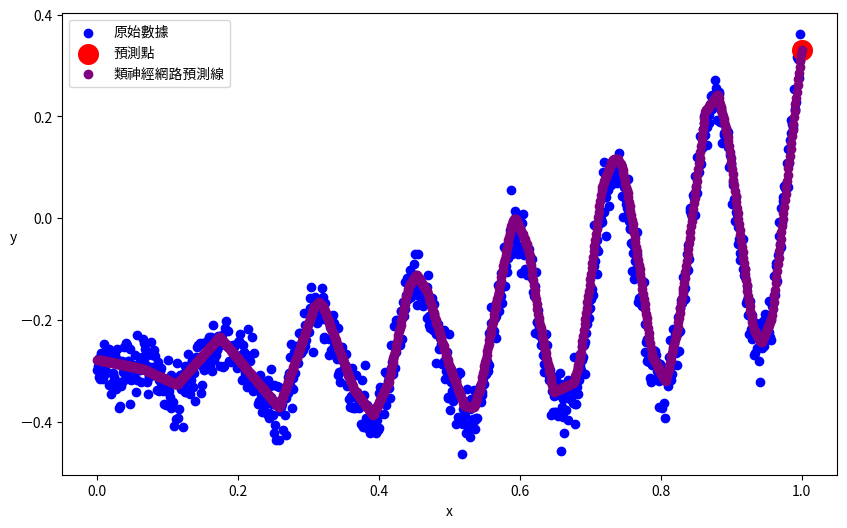

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
#原始數據
plt.scatter(df2['x'],df2['y'],color="blue",label="原始數據")
#預測點
plt.scatter([[1]],model2.predict([[1]]),color="red",label="預測點",s=200)
#類神經網路預測線
plt.scatter(df2['x'],model2.predict(df2['x']),color="purple",label="類神經網路預測線")
plt.xlabel("x")
plt.ylabel("y",rotation=0)
plt.legend()
plt.show()

32/32 [==============================] - 0s 3ms/step


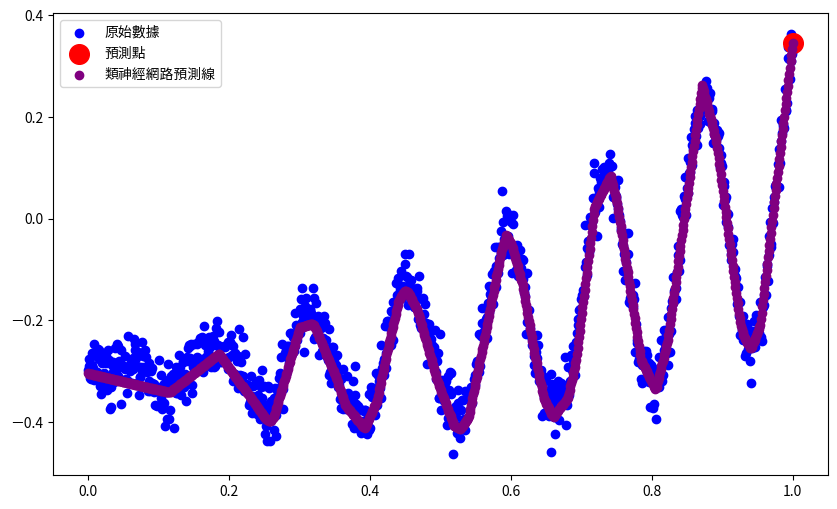

In [ ]:
#老師參考答案

---
#3.練習3：用sklearn模組，建立『KNN』演算法來預測鐵達尼號乘客是否會存活？

#(1)預測【乘客等級,年齡,性別】 = 【1st, 30, female】是否生存？

#(2)預測【乘客等級,年齡,性別】 = 【3rd, 31, male】是否生存？

#(3)預測【乘客等級,年齡,性別】 = 【2nd, 27, male】是否生存？

#**注意：請回答【會生存，不會生存】，不要回答0/1**
---
#資料集檔案：
https://acupun.site/lecture/predict/example/resource/titanic_pre-chi.xlsx

#資料表：data

---
#特徵欄位：乘客等級，年齡，性別

#標籤label欄位：是否生存
0：亡

1：生存



In [ ]:
import pandas as pd
import sklearn.neighbors as nb
df3_b = pd.read_excel("https://acupun.site/lecture/predict/example/resource/titanic_pre-chi.xlsx")
df3=df3_b.replace("1st",1).replace("2nd",2).replace("3rd",3).replace("male",1).replace("female",0)
#Step1:
model3=nb.KNeighborsClassifier(n_neighbors=3)
#Step2:
model3.fit(df3[["乘客等級","年齡","性別"]],df3["是否生存"])

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#(1)預測【乘客等級,年齡,性別】 = 【1st, 30, female】是否生存？
if model3.predict([[1,30,0]])[0]==0:
  print("亡，不適合生存")
elif model3.predict([[1,30,0]])[0]==1:
  print("適合生存")

適合生存


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#(2)預測【乘客等級,年齡,性別】 = 【3rd, 31, male】是否生存？
if model3.predict([[3,31,1]])[0]==0:
  print("亡，不適合生存")
elif model3.predict([[3,31,1]])[0]==1:
  print("適合生存")

亡，不適合生存


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#(3)預測【乘客等級,年齡,性別】 = 【2nd, 27, male】是否生存？
if model3.predict([[2,27,1]])[0]==0:
  print("亡，不適合生存")
elif model3.predict([[2,27,1]])[0]==1:
  print("適合生存")

亡，不適合生存


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


---
#4.練習4：讀入『A商城會員資料集』，請做自動分群，將之分成5種會員屬性，請分出來？並作預測
#案例資料集選自Kaggle：商城使用者細分數據(Mall Customer Segmentation Data)
基於某一家商城會員的基本資料，由各種特徵欄位，來進行客戶細分，以便可以給行銷團隊進一步制定決策提供依

#將商城會員分為如下聚類/分群：
•	謹慎消費者（高收入且低消費的客戶）

•	標準消費者（與其他客戶相比，擁有平均收入和平均消費的客戶）

•	目標消費者（高收入且高消費的客戶）

•	非理性消費者（收入少且高消費的客戶）

•	理性消費者（低收入且低消費的客戶）

---
#這是一個關於商場顧客的資料集，它包含了 200 個顧客的 4 個特徵，
#特徵欄位分別是【性別、年齡、年收入，消費得分】。

消費得分是根據顧客的消費行為和購買力給出的一個數值，越高表示越有可能成為忠實的顧客。

我們可以用這個資料集來做聚類分析，看看能否將顧客分成不同的市場區隔，並根據他們的特徵和消費得分來制定相應的行銷策略。

---
#已知下方的特徵欄位，對應的客戶分群標籤：
•	【Male, 32, 137, 18】：謹慎消費者（高收入且低消費的客戶）

•	【Female, 29, 40, 42】：標準消費者（與其他客戶相比，擁有平均收入和平均消費的客戶）

•	【Male, 30, 137, 83】：目標消費者（高收入且高消費的客戶）

•	【Male, 21, 15, 81】：非理性消費者（收入少且高消費的客戶）

•	【Female, 20, 16, 6】： 理性消費者（低收入且低消費的客戶）

---

#請自行由此來驗證並判別你的自動分群的編號所對應之品種

---
#數據集檔案：
https://acupun.site/lecture/predict/example/resource/Mall_Customers_chi.csv


In [ ]:
#☎範例示範（本題不要做，只是給你看如何回答）：請做預測:D客戶的特徵值【性別，年齡，年收入，消費得分】
#=【Female,42,34,17】，請問D客戶的屬性歸類？

他是：理性消費者（低收入且低消費的客戶


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import sklearn.cluster as cls
df4_b=pd.read_csv("https://acupun.site/lecture/predict/example/resource/Mall_Customers_chi.csv")
df4=df4_b.replace("Male",1).replace("Female",0)
#Step1:
model4=cls.KMeans(n_clusters=5,random_state=12) #已知有4種分類
#Step2:
model4.fit(df4[["性別","年齡","年收入","消費得分"]])
#Step3:
print("分群cluster的物種標籤label：", model4.labels_)

分群cluster的物種標籤label： [2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df4

,客戶ID,性別,年齡,年收入,消費得分
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


#先做驗證
• 【Male, 32, 137, 18】：謹慎消費者（高收入且低消費的客戶）

• 【Female, 29, 40, 42】：標準消費者（與其他客戶相比，擁有平均收入和平均消費的客戶）

• 【Male, 30, 137, 83】：目標消費者（高收入且高消費的客戶）

• 【Male, 21, 15, 81】：非理性消費者（收入少且高消費的客戶）

• 【Female, 20, 16, 6】： 理性消費者（低收入且低消費的客戶）

In [ ]:
model4.predict([[1,32,137,18]])[0] #1:謹慎消費者（高收入且低消費的客戶）

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


1

In [ ]:
model4.predict([[0,29,40,42]])[0] #0:標準消費者（與其他客戶相比，擁有平均收入和平均消費的客戶）

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


0

In [ ]:
model4.predict([[1,30,137,83]])[0] #4:目標消費者（高收入且高消費的客戶）

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


4

In [ ]:
model4.predict([[1,21,15,81]])[0] #3:非理性消費者（收入少且高消費的客戶）

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


3

In [ ]:
model4.predict([[0,20,16,6]])[0] #2:理性消費者（低收入且低消費的客戶）

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


2

結果:

0:標準消費者（與其他客戶相比，擁有平均收入和平均消費的客戶）

1:謹慎消費者（高收入且低消費的客戶）

2:理性消費者（低收入且低消費的客戶）

3:非理性消費者（收入少且高消費的客戶）

4:目標消費者（高收入且高消費的客戶）

#接續題目

In [ ]:
#☎(1).請做預測1:A客戶的特徵值【性別，年齡，年收入，消費得分】
#=【Male, 59, 43, 60】，請問A客戶的屬性歸類？
if model4.predict([[1,59,43,60]])[0]==0:
  print("他是：{}".format("標準消費者（與其他客戶相比，擁有平均收入和平均消費的客戶）"))
elif model4.predict([[1,59,43,60]])[0]==1:
  print("他是：{}".format("謹慎消費者（高收入且低消費的客戶）"))
elif model4.predict([[1,59,43,60]])[0]==2:
  print("他是：{}".format("理性消費者（低收入且低消費的客戶）"))
elif model4.predict([[1,59,43,60]])[0]==3:
  print("他是：{}".format("非理性消費者（收入少且高消費的客戶）"))
elif model4.predict([[1,59,43,60]])[0]==4:
  print("他是：{}".format("目標消費者（高收入且高消費的客戶）"))

他是：標準消費者（與其他客戶相比，擁有平均收入和平均消費的客戶）


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
#☎(2).請做預測2:B客戶的特徵值【性別，年齡，年收入，消費得分】
#=【Female,34,103,23】，請問B客戶的屬性歸類？
if model4.predict([[0,34,103,23]])[0]==0:
  print("他是：{}".format("標準消費者（與其他客戶相比，擁有平均收入和平均消費的客戶）"))
elif model4.predict([[0,34,103,23]])[0]==1:
  print("他是：{}".format("謹慎消費者（高收入且低消費的客戶）"))
elif model4.predict([[0,34,103,23]])[0]==2:
  print("他是：{}".format("理性消費者（低收入且低消費的客戶）"))
elif model4.predict([[0,34,103,23]])[0]==3:
  print("他是：{}".format("非理性消費者（收入少且高消費的客戶）"))
elif model4.predict([[0,34,103,23]])[0]==4:
  print("他是：{}".format("目標消費者（高收入且高消費的客戶）"))

他是：謹慎消費者（高收入且低消費的客戶）


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
#☎(3).請做預測3:C客戶的特徵值【性別，年齡，年收入，消費得分】
#=【Male, 30, 99, 97】，請問C客戶的屬性歸類？
if model4.predict([[1,30,99,97]])[0]==0:
  print("他是：{}".format("標準消費者（與其他客戶相比，擁有平均收入和平均消費的客戶）"))
elif model4.predict([[1,30,99,97]])[0]==1:
  print("他是：{}".format("謹慎消費者（高收入且低消費的客戶）"))
elif model4.predict([[1,30,99,97]])[0]==2:
  print("他是：{}".format("理性消費者（低收入且低消費的客戶）"))
elif model4.predict([[1,30,99,97]])[0]==3:
  print("他是：{}".format("非理性消費者（收入少且高消費的客戶）"))
elif model4.predict([[1,30,99,97]])[0]==4:
  print("他是：{}".format("目標消費者（高收入且高消費的客戶）"))

他是：目標消費者（高收入且高消費的客戶）


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
